In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import time
import seaborn as sns
import os
from citipy import citipy
from random import uniform


In [3]:
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
#url = "http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q='

In [4]:
#test random long lat https://gis.stackexchange.com/questions/59339/generate-random-world-point-geometries
def newpoint():
   return uniform(-180,180), uniform(-90, 90)

points = (newpoint() for x in range(10))
for point in points:
   print(point)
#passes getting coordinates

(10.602072596938143, -42.80141915300513)
(147.31721767331027, -45.33547360980032)
(-58.9569339358263, -65.89718501290635)
(-79.64830906012534, -58.891310854733845)
(-159.68652714625915, 73.96293232865006)
(88.94518293015949, -13.78943461535195)
(91.68006107412322, -15.296495114202145)
(-39.18661979986126, -21.498340367116228)
(-87.83843697135693, -85.65407456259999)
(91.57324887297011, -85.2933534375294)


In [5]:
def newpoint():
   return uniform(-180,180), uniform(-90, 90)

points = (newpoint() for x in range(10))
for point in points:
    city = citipy.nearest_city(point[0],point[1])
    #non-repeat get city url
    if not city.city_name in cities:
        cities_url = query_url + city.city_name
        response = requests.get(cities_url).json()
        cities.append(city.city_name)
    
  
    index = index + 1
    if index == 10:
        break
cities

['barentsburg',
 'belushya guba',
 'ushuaia',
 'cape town',
 'arraial do cabo',
 'bredasdorp',
 'port alfred']

In [16]:
weather_data = []
cities = []
index = 0


def newpoint():
   return uniform(-180,180), uniform(-90, 90)

points = (newpoint() for x in range(9000))
for point in points:
    city = citipy.nearest_city(point[0],point[1])
    
    #non-repeat get city url
    if not city.city_name in cities:
        cities_url = query_url + city.city_name
        response = requests.get(cities_url).json()
        
        if 'main' not in response:
            print("Error with city weather. skipping")

        else:
            cities.append(city.city_name)
            weather_data.append(response)
            #name_data = city
            temp_data = [data.get("main").get("temp") for data in weather_data]
            cloudiness_data = [data.get("clouds").get("all") for data in weather_data]
            wind_data = [data.get("wind").get("speed") for data in weather_data]
            humidity_data = [data.get("main").get("humidity") for data in weather_data]
            lat_data = [data.get("coord").get("lat") for data in weather_data]
            lon_data = [data.get("coord").get("lon") for data in weather_data]
            print(cities_url)

            cities_df = {"city": cities, "longitude": lon_data, "Latitude": lat_data, "temperature": temp_data, 
                             "humidity": humidity_data, "wind": wind_data, "clouds": cloudiness_data}
            weather_df = pd.DataFrame(cities_df)
            weather_df


            index = index + 1
            if index == 500:
                break
weather_df

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tessalit
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=dikson
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cidreira
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saint george
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bredasdorp
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=2

Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=luderitz
Error with city weather. skipping
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=coruripe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mana
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=zvishavane
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=marystown
Error with city weather. skipping
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ilulissat
Error with city weather. skipping
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&unit

Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lebu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=beeskow
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=batticaloa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=grand gaube
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rorvik
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=peniche
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=naranjito
Error with city weather. skipping
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=gazojak
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=krotoszyn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=barranca
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=chicama
Error with city weather. skipping
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saryozek
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lodhikheda
http://api

Error with city weather. skipping
Error with city weather. skipping
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=siilinjarvi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=palotina
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=astana
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cabedelo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mehamn
Error with city weather. skipping
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=constitucion
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=teguldet
http://ap

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=funadhoo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=panjab
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=viedma
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san pedro del parana
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=dalbandin
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=havre-saint-pierre
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=chimoio
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=impe

Error with city weather. skipping
Error with city weather. skipping
Error with city weather. skipping
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=visnes
Error with city weather. skipping
Error with city weather. skipping
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=henties bay
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mansa
Error with city weather. skipping
Error with city weather. skipping
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=andros town
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=manta
Error with city weather. skipping
http://api.openweathermap.org/data

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=paisley
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sept-iles
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=krutinka
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=damghan
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=andreapol
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=verkhniy mamon
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=adrar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lamu
Error with city weather. skipping
htt

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=margate
Error with city weather. skipping
Error with city weather. skipping
Error with city weather. skipping
Error with city weather. skipping
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=islamabad
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ayna
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ahmadpur east
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kralendijk
Error with city weather. skipping
Error with city weather. skipping
Error with city weather. skipping
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=totness
Error with city weat

,Latitude,city,clouds,humidity,longitude,temperature,wind
0,28.66,los llanos de aridane,40,62,-17.92,59.00,4.70
1,20.20,tessalit,56,47,1.01,64.62,8.63
2,73.51,dikson,0,74,80.55,-2.30,13.82
3,-30.17,cidreira,12,99,-50.22,64.66,13.33
4,39.45,saint george,75,87,22.34,50.00,5.82
5,-34.53,bredasdorp,76,77,20.04,69.80,17.22
6,-54.81,ushuaia,40,70,-68.31,44.60,28.86
7,62.23,klaksvik,68,75,-6.59,42.80,21.92
8,-33.59,port alfred,24,95,26.89,69.57,13.56
9,77.48,qaanaaq,48,100,-69.36,-13.42,6.89


In [56]:
file_name = os.path.join("","weather_df.xlsx")
weather_df.to_excel(file_name, index=False)

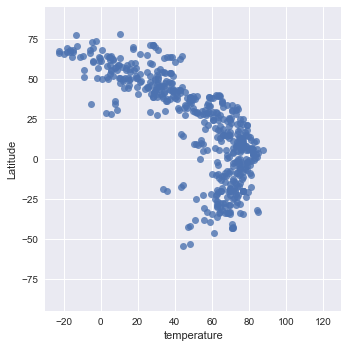

In [39]:
sns.set()
sns.lmplot( x="temperature", y="Latitude", data=weather_df, fit_reg=False)
 
# Move the legend to an empty part of the plot

plt.ylim(-95,95)
plt.xlim(-30,130) 
plt.show()

plt.savefig("TemperatureLatitude.png")


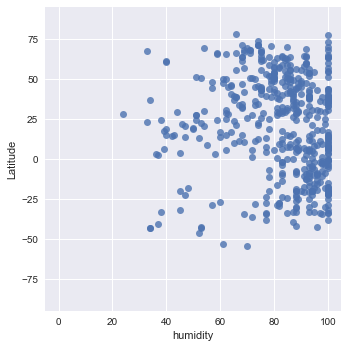

In [49]:
sns.set()
sns.lmplot( x="humidity", y="Latitude", data=weather_df, fit_reg=False)
 
# Move the legend to an empty part of the plot

plt.ylim(-95,95)
plt.xlim(-5,105) 
plt.show()

plt.savefig("HumidityLatitude.png")

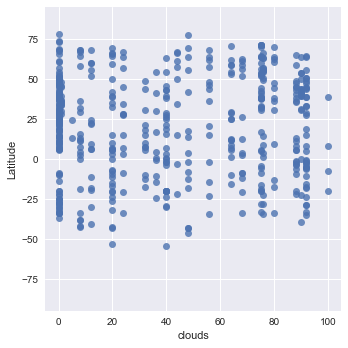

In [47]:
sns.set()
sns.lmplot( x="clouds", y="Latitude", data=weather_df, fit_reg=False)
 
# Move the legend to an empty part of the plot

plt.ylim(-95,95)
plt.xlim(-5,105) 
plt.show()

plt.savefig("cloudsLatitude.png")

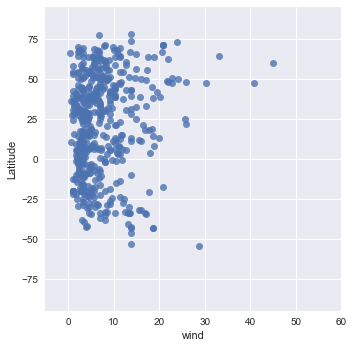

In [50]:
sns.set()
sns.lmplot( x="wind", y="Latitude", data=weather_df, fit_reg=False)
 
# Move the legend to an empty part of the plot

plt.ylim(-95,95)
plt.xlim(-5,60)  
plt.show()

plt.savefig("windLatitude.png")


Analysis: 1) Wind is higher in higher altitudes. 2) Temperatures are higher near 0 latitude, the equator. 3) Humidity is higher in higher altitudes